# EMG spectrogram visualization

This notebook shows how to compute the spectrogram of the EMG samples capture by the Myo armband.

NOTE: you need to install the additional library `librosa` to generate the spectrogram plot.

In [2]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

import pandas as pd

In [5]:
activities_to_classify = {
        0:'Get items from refrigerator/cabinets/drawers',
        1:'Peel a cucumber',
        2:'Clear cutting board',
        3:'Slice a cucumber',
        4:'Peel a potato',
        5:'Slice a potato',
        6:'Slice bread',
        7:'Spread almond butter on a bread slice',
        8:'Spread jelly on a bread slice',
        9:'Open a jar of almond butter',
        10:'Pour water from a pitcher into a glass',
        11:'Clean a plate with a sponge',
        12:'Clean a plate with a towel',
        13:'Clean a pan with a sponge',
        14:'Clean a pan with a towel',
        15:'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils',
        16:'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils',
        17:'Stack on table: 3 each large/small plates, bowls',
        18:'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils',
        19:'Unload dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils',
}

In [28]:
import librosa
import matplotlib.pyplot as plt

def plot_spectrogram(specgram, label, ylabel="freq_bin"):
    fig, axs = plt.subplots(len(specgram), 1, figsize=(10, 5))
    description_label=activities_to_classify[int(label)]
 
    axs[0].set_title(description_label)

    for i, spec in enumerate(specgram):
        im = axs[i].imshow(librosa.power_to_db(specgram[i]), origin="lower", aspect="auto")
        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)
    #axs[i].set_xlabel("Frame number")
    axs[i].get_xaxis().set_visible(True)
    plt.show(block=False)

In [8]:
# Sampling frequency is 160 Hz
# With 32 samples the frequency resolution after FFT is 160 / 32

n_fft = 32
win_length = None
hop_length = 4

spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    normalized=True
)


def compute_spectrogram(signal, title):
    freq_signal = [spectrogram(signal[:, i]) for i in range(8)]
    print(freq_signal)
    plot_spectrogram(freq_signal, title=title)

In [23]:
# Replace with your path to one of the subjects from Action-Net
emg_annotations = pd.read_pickle("../EMG_data/Provided/S03_2.pkl")

sample_no = 1
signal = torch.from_numpy(emg_annotations.iloc[sample_no].myo_left_readings).float()
title = emg_annotations.iloc[sample_no].description

[tensor([[2.2696e+01, 1.6328e+01, 6.3428e+00,  ..., 1.7551e+00, 1.2658e+01,
         1.6530e+01],
        [4.5726e+01, 3.2671e+01, 9.2012e+00,  ..., 1.3694e-01, 1.0469e+01,
         3.0798e+01],
        [1.1991e+02, 9.3120e+01, 4.9490e+01,  ..., 5.3532e+01, 3.9234e+01,
         2.8505e+01],
        ...,
        [4.1794e-02, 2.0185e+01, 1.3695e+02,  ..., 5.0274e+02, 3.4133e+02,
         2.2304e+02],
        [3.9734e+02, 4.8647e+02, 5.1695e+02,  ..., 1.0917e+03, 6.0358e+02,
         1.2583e+02],
        [1.3690e+03, 1.0605e+03, 4.7529e+02,  ..., 9.3115e+02, 6.7890e+02,
         2.8680e+02]]), tensor([[2.2341e+01, 1.4469e+01, 3.9534e+00,  ..., 1.5262e+01, 1.8086e+01,
         1.7552e+01],
        [6.0667e+01, 4.6484e+01, 1.8044e+01,  ..., 3.7703e+00, 2.8680e+00,
         6.7687e+00],
        [1.6850e+02, 1.3196e+02, 7.0350e+01,  ..., 2.9224e+00, 1.0510e+00,
         6.1125e-01],
        ...,
        [8.0400e-01, 3.0602e+01, 2.4175e+02,  ..., 6.5405e+01, 1.9243e+01,
         2.1328e+00],
 

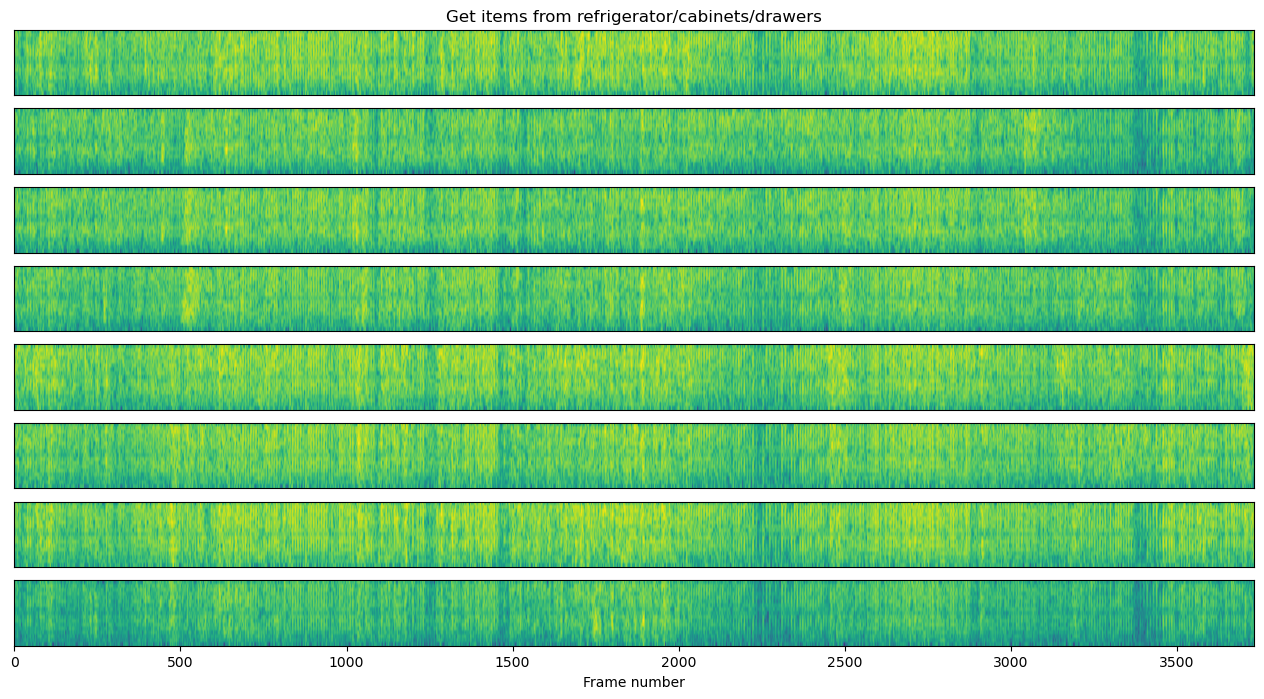

In [26]:
compute_spectrogram(signal, title)

In [ ]:
# Replace with your path to one of the subjects from Action-Net

n_fft = 32
win_length = None
hop_length = 4


spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    normalized=True
)

def compute_spectrogram(signal, title):
    freq_signal = [spectrogram(signal[:, i]) for i in range(8)]
    plot_spectrogram(freq_signal, title=title)

emg_annotations = pd.read_pickle("../SXY_train.pkl")
#print(emg_annotations.iloc[0].emg_data.shape)
sample_no = 501
signal = torch.from_numpy(emg_annotations.iloc[sample_no].emg_data).float()
title = emg_annotations.iloc[sample_no].description
compute_spectrogram(signal, title)

torch.Size([100, 16])
torch.Size([17, 26])
torch.Size([17, 26])
torch.Size([17, 26])
torch.Size([17, 26])
torch.Size([17, 26])
torch.Size([17, 26])
torch.Size([17, 26])
torch.Size([17, 26])
torch.Size([17, 26])
torch.Size([17, 26])
torch.Size([17, 26])
torch.Size([17, 26])
torch.Size([17, 26])
torch.Size([17, 26])
torch.Size([17, 26])
torch.Size([17, 26])


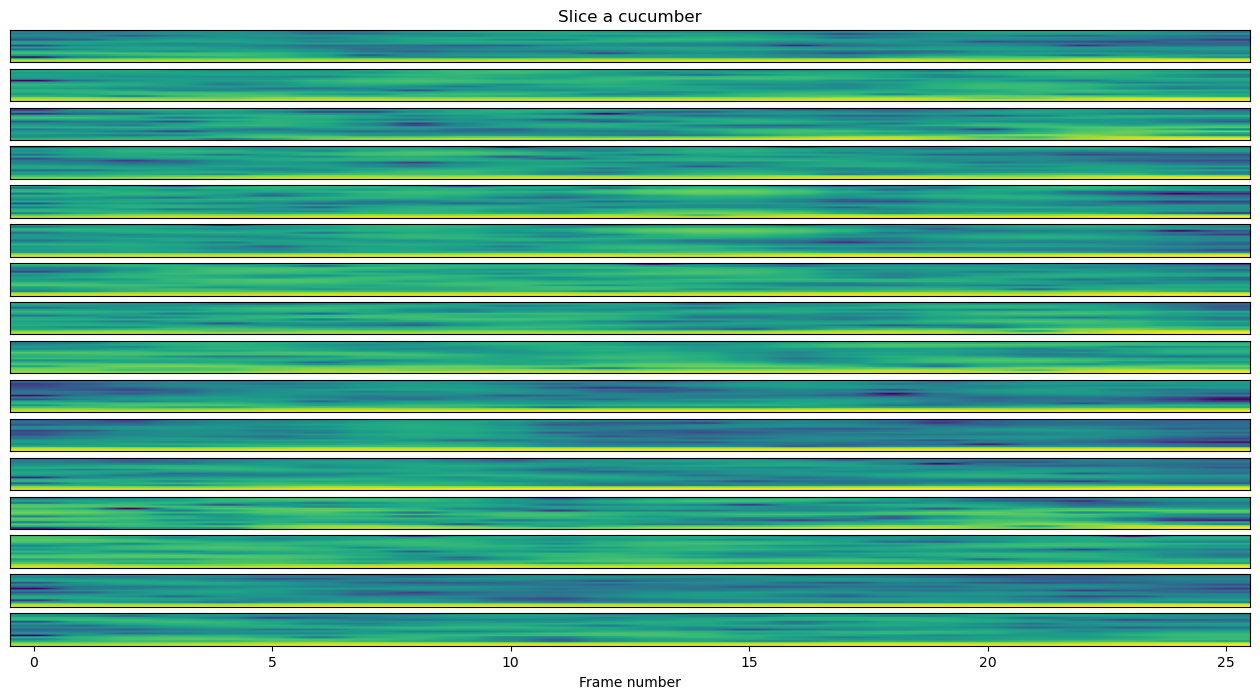

In [22]:
# Replace with your path to one of the subjects from Action-Net

n_fft = 32
win_length = None
hop_length = 4


spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    normalized=False
)



def compute_spectrogram(signal, title):
    # Reshape the matrix into a vector
    print(signal.shape)
    freq_signal = [spectrogram(signal[:, i]) for i in range(16)]
    for fs in freq_signal:
        print(fs.shape)
    plot_spectrogram(freq_signal, title=title)

emg_annotations = pd.read_pickle("C:/Users/Laura/Desktop/Universita/Polito/Advanced Machine Learning/Progetto/aml23-ego/emg_preprocessed_test.pkl")

#emg_annotations = pd.read_pickle("C:/Users/Laura/Desktop/Universita/Polito/Advanced Machine Learning/Progetto/aml23-ego/EMG_data/Provided/S00_2.pkl")

sample_no = 200
signal = torch.from_numpy(emg_annotations.iloc[sample_no]['emg_data']).float()

#signal = torch.from_numpy(emg_annotations.iloc[sample_no]['myo_left_readings']).float()

title = emg_annotations.iloc[sample_no]['description']
compute_spectrogram(signal, title)

# Plotting my spectrograms

In [21]:
import pandas as pd
data=pd.read_pickle("C:/Users/Laura/Desktop/Universita/Polito/Advanced Machine Learning/aml23-ego/an_multimodal_annotations/allData_trial_test.pkl")
data[data['uid']==25]

,uid,description,verb_class
795,155,Open a jar of almond butter,9


torch.Size([17, 26])


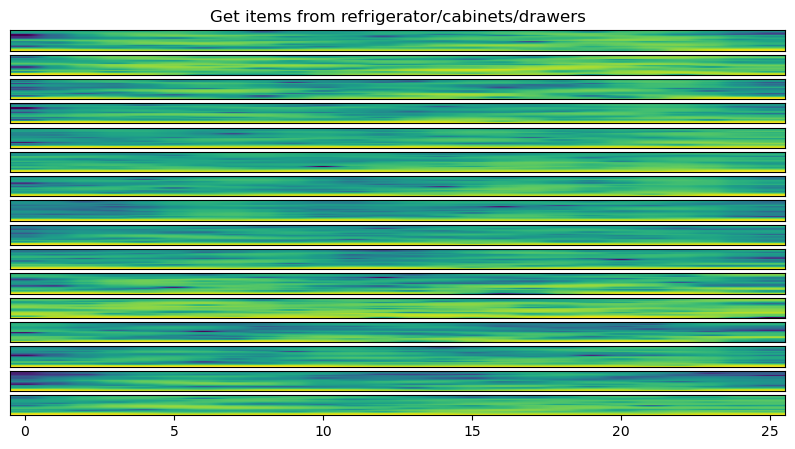

In [29]:
import numpy
spectrograms = pd.read_pickle("C:/Users/Laura/Desktop/Universita/Polito/Advanced Machine Learning/aml23-ego/saved_features_an_multimodal/features_emg_spectrogram_S04_test.pkl")['features']

print(spectrograms[0]['features_EMG_spectrogram'][0].shape)
plot_spectrogram(numpy.array(spectrograms[0]['features_EMG_spectrogram']) , 0)